# Data analysis of the models results

This notebook aims to provide analytical tools to work on the damage functions modeled in the WILIAM model folder. 

## Model import and initialisation

In [12]:
import pysd
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
reload = False

if reload:
    model = pysd.read_vensim(r'C:\\Users\\gabriel.genelot\\Documents\\damage-functions\\WILIAM_v1.3\\WILIAM.mdl', 
                             missing_values='skip')
else:
    model = pysd.load('WILIAM_v1.3/WILIAM.py')

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pysd\py_backend\data.py:220: UserWarning: _ext_data_co2_tax_sectors_sp
extrapolating data below the minimum value of the time
  warnings.warn(
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pysd\py_backend\data.py:220: UserWarning: _ext_data_share_pv_subtechnologies_before_2020
extrapolating data below the minimum value of the time
  warnings.warn(
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: d

## Model runs

In this section, we run the model. 

In [2]:
variables = model.doc
variables.to_csv('variables.csv', index=False)

NameError: name 'model' is not defined

In [3]:
variables = pd.read_csv('variables.csv')

In [4]:
variables_FUND = variables[variables['Real Name'].str.contains('FUND')]
variables_FUND_names = variables_FUND['Py Name'].values
variables_FUND_names

array(['fund_a2_delayed_agricultural_impact_of_the_rate_of_climate_change',
       'fund_a2_agricultural_impact_of_the_rate_of_climate_change',
       'fund_a2_alpha_parameter', 'fund_a2_beta_parameter',
       'fund_a2_rate_of_temperature_change', 'fund_a2_rho_parameter',
       'fund_a2_temperature_change_delayed',
       'fund_a3_agricultural_impact_of_the_level_of_climate_change',
       'fund_a3_delta_l_parameter', 'fund_a4_delta_q_parameter',
       'fund_a4_gamma_parameter', 'fund_e1_space_heating',
       'fund_e1_alpha_parameter', 'fund_e1_epsilon_parameter',
       'fund_e2_autonomous_energy_efficiency_improvement',
       'fund_e2_space_cooling', 'fund_e2_alpha_parameter',
       'fund_e2_beta_parameter',
       'fund_f1_forestry_change_in_consumer_and_producer_surplus',
       'fund_f1_alpha_parameter_on_global_warming_economic_impact',
       'fund_f1_beta_parameter', 'fund_f1_epsilon_parameter',
       'fund_f1_gamma_parameter', 'fund_slr10_npvvp',
       'fund_slr10_slr_

In [35]:
initial_time = 2005
final_time = 2006 

In [15]:
# Suppress specific warnings to avoid cluttering the output
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)


run = model.run(progress=True, 
                return_columns=variables_FUND_names,
                final_time=final_time,  
                output_file='results/results_agri.nc'
                )

warnings.resetwarnings()

ETA:  --:--:-- [----------------------------------------------------------]  0%
ETA:   0:00:15 [##############--------------------------------------------] 25%
ETA:   0:00:13 [#############################-----------------------------] 50%
ETA:   0:00:06 [###########################################---------------] 75%
ETA:  00:00:00 [##########################################################]100%
Time:  0:00:29 [##########################################################]100%


Results stored in results\results_agri.nc


## Results visualisation

In [47]:
ds = xr.open_dataset('results/results_run_2048.nc')
variable = "fund_a2_agricultural_impact_of_the_rate_of_climate_change"
data = ds[variable].to_dataframe().reset_index()
ds.close()



<Axes: xlabel='time', ylabel='fund_a2_agricultural_impact_of_the_rate_of_climate_change'>

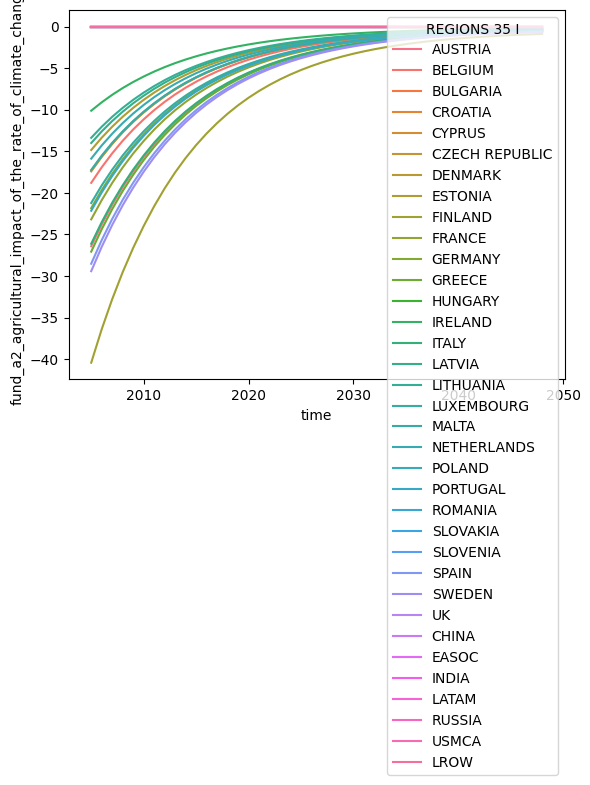

In [48]:
data_reduced = data[data['REGIONS 35 I'].isin(['AUSTRIA', 'FRANCE', 'FINLAND', 'UK', 'CHINA'])]
sns.lineplot(data, x='time', y=variable, hue='REGIONS 35 I')

In [15]:
data

,time,REGIONS 35 I,fund_f1_forestry_change_in_consumer_and_producer_surplus
0,2005.0,AUSTRIA,NaN
1,2005.0,BELGIUM,0.000013
2,2005.0,BULGARIA,0.000000
3,2005.0,CROATIA,0.000000
4,2005.0,CYPRUS,0.000012
...,...,...,...
1535,2048.0,INDIA,0.000000
1536,2048.0,LATAM,0.000000
1537,2048.0,RUSSIA,0.000000
1538,2048.0,USMCA,0.000000


## Mapping a little bit

In [7]:
import pandas as pd
import geopandas as gpd

<Axes: >

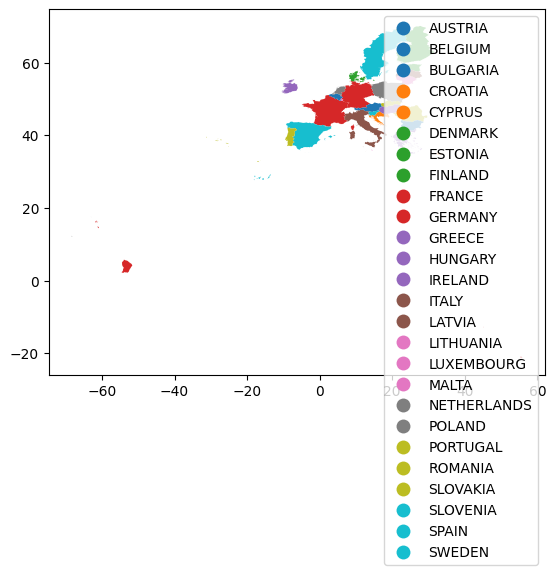

In [29]:
map = gpd.read_file(r'WILIAM_v1.3\geography\output_countries\countries.shp')
#map.head()
map.plot(column='Region_WIL', legend=True)

In [39]:
data_map

,time,REGIONS 35 I,fund_f1_forestry_change_in_consumer_and_producer_surplus


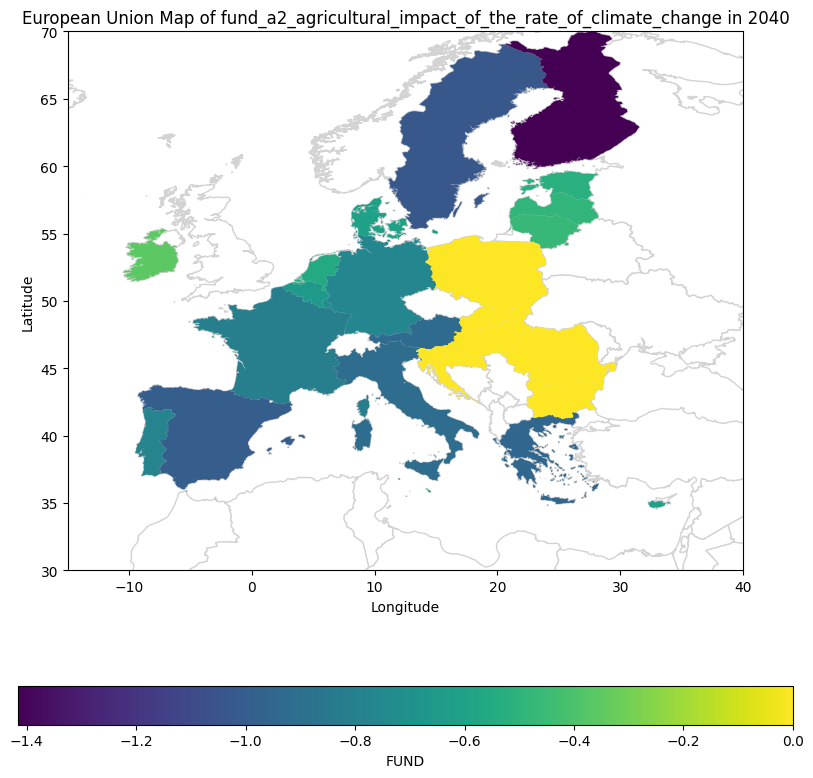

In [51]:
map_time = 2040
data_map = data[data['time'] == map_time]

map_phenomenon = map.merge(data_map, left_on='Region_WIL', right_on='REGIONS 35 I')

import matplotlib.pyplot as plt


# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
map.plot(ax=ax, color='white', edgecolor='lightgray')
map_phenomenon.plot(ax=ax, 
                    column=variable, 
                    legend=True, 
                    legend_kwds={'label': "FUND", 
                                 'orientation': "horizontal"})

# Set the title and axis labels
ax.set_title(f'European Union Map of {variable} in {map_time}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Define the bounding box coordinates for continental European Union
x_min = -15
x_max = 40
y_min = 30
y_max = 70

# Set the x and y limits of the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()



In [33]:
map_phenomenon.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_UA,Region_WIL,Region_FUN,Region_F_1,Countries,ISO,geometry,time,REGIONS 35 I,fund_f1_forestry_change_in_consumer_and_producer_surplus
0,Admin-0 country,0,2,France,FR1,1,2,Country,1,France,...,None,FRANCE,WEU,Western Europe,France,FRA,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2...",2005.0,FRANCE,0.000014
1,Admin-0 country,0,2,France,FR1,1,2,Country,1,France,...,None,FRANCE,WEU,Western Europe,France,FRA,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2...",2006.0,FRANCE,0.000014
2,Admin-0 country,0,2,France,FR1,1,2,Country,1,France,...,None,FRANCE,WEU,Western Europe,France,FRA,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2...",2007.0,FRANCE,0.000015
3,Admin-0 country,0,2,France,FR1,1,2,Country,1,France,...,None,FRANCE,WEU,Western Europe,France,FRA,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2...",2008.0,FRANCE,0.000015
4,Admin-0 country,0,2,France,FR1,1,2,Country,1,France,...,None,FRANCE,WEU,Western Europe,France,FRA,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2...",2009.0,FRANCE,0.000015


In [28]:
map.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'Region_WIL',
       'Region_FUN', 'Region_F_1', 'Countries', 'ISO', 'geometry'],
      dtype='object', length=174)

In [24]:
map.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,Code,Name_1,Countries,ISO,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,SEA,Southeast Asia,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,SEA,Southeast Asia,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,SAM,South America,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,SAM,South America,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,SAM,South America,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


ValueError: aspect must be finite and positive 

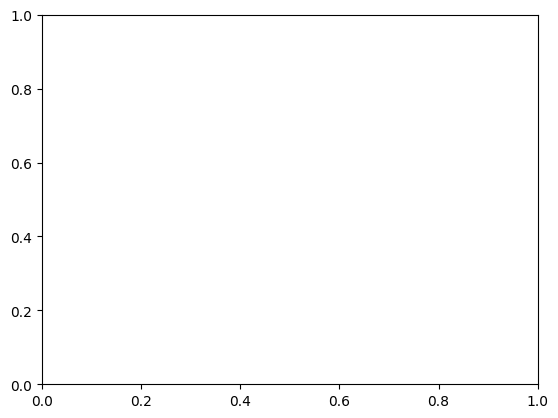

In [21]:
map = map.merge(data_reduced, left_on='Countries', right_on='REGIONS 35 I')
map.plot()